In [ ]:
!pip install rembg


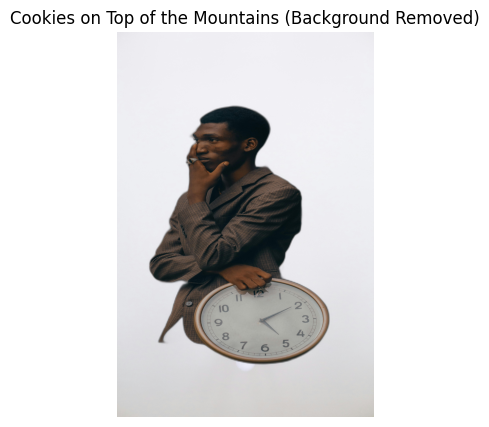

In [3]:
# Install necessary packages
!pip install onnxruntime
!pip install rembg

# Then proceed with the image background removal and processing code
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import rembg
from io import BytesIO

# Step 1: Upload the images
#uploaded = files.upload()

# Load the images
input_image_path = '/content/pexels-meshack-emmanuel-kazanshyi-1267432081-29248997.jpg'  # Path to the uploaded cookies image
output_image_path = '/content/pexels-lamiko-3616773.jpg'  # Path to the uploaded mountain image

# Open the images
output_image = Image.open(output_image_path)

# Step 2: Remove the background from the cookies image
with open(input_image_path, 'rb') as input_file:
    input_data = input_file.read()
    output_data = rembg.remove(input_data)  # Remove background

# Step 3: Convert the background-removed image to PIL format
input_image_no_background = Image.open(BytesIO(output_data))

# Step 4: Resize the cookies image to fit on the mountain image
cookies_resized = input_image_no_background.resize((5000, 5000))  # Adjust size as needed

# Step 5: Position the cookies image on top of the mountain image
# Define the position (you can adjust this)
position = (int((output_image.width - cookies_resized.width) / 2),
            int(output_image.height - cookies_resized.height - 50))  # Change position as needed, this changes the photo background image sizes

# Step 6: Paste the cookies image (with transparent background) onto the mountain image
output_image.paste(cookies_resized, position, cookies_resized.convert("RGBA"))

# Step 7: Display the final image
plt.figure(figsize=(10, 5))
plt.title('Cookies on Top of the Mountains (Background Removed)')
plt.imshow(output_image)
plt.axis('off')
plt.show()
